<a href="https://colab.research.google.com/github/Beatoy/INTELIGENCIA-ARTIFICIAL/blob/main/REDES%20CONVUCIONALES/DIGITOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.4771 - loss: 1.9021 - val_accuracy: 0.8819 - val_loss: 0.8404
Epoch 2/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.9248 - loss: 0.6078 - val_accuracy: 0.9028 - val_loss: 0.3766
Epoch 3/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.9497 - loss: 0.2711 - val_accuracy: 0.9444 - val_loss: 0.2469
Epoch 4/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9660 - loss: 0.1662 - val_accuracy: 0.9444 - val_loss: 0.1885
Epoch 5/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9727 - loss: 0.1154 - val_accuracy: 0.9514 - val_loss: 0.1630
Epoch 6/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.9885 - loss: 0.0720 - val_accuracy: 0.9618 - val_loss: 0.1254
Epoch 7/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9883 - loss: 0.0689 - val_accuracy: 0.9618 - val_loss: 0.1168
Epoch 8/10
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9935 - loss: 0.0564 - val_accuracy: 0.9722 - v

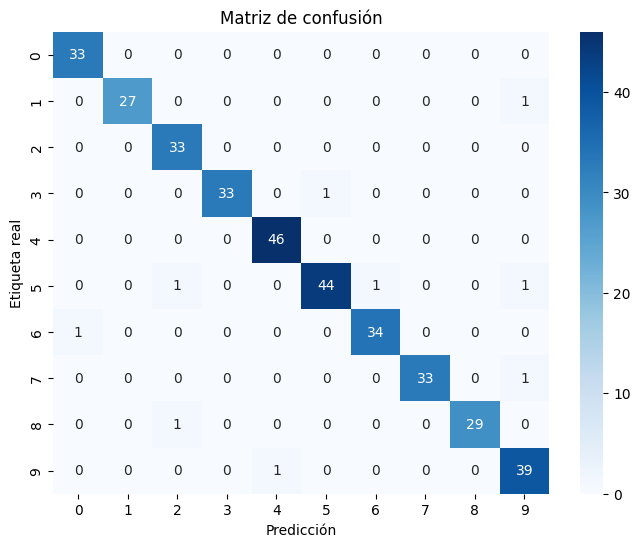

Clase 0: 1.0000
Clase 1: 0.9643
Clase 2: 1.0000
Clase 3: 0.9706
Clase 4: 1.0000
Clase 5: 0.9362
Clase 6: 0.9714
Clase 7: 0.9706
Clase 8: 0.9667
Clase 9: 0.9750
No se encontró 'mi_numero.png' en el directorio. Usa el selector para subir la imagen ahora.


Saving CERO.avif to CERO.avif


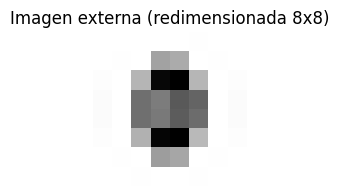

Predicción final: 4 (confianza 100.0%)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns
from PIL import Image
import os

# Cargar dataset digits (8x8, valores típicos 0-16)
digits = load_digits()

# Datos y etiquetas
X = digits.data        # forma (n_samples, 64)
y = digits.target      # etiquetas 0..9

# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# One-hot para entrenamiento
y_train_oh = to_categorical(y_train, num_classes=10)
y_test_oh = to_categorical(y_test, num_classes=10)

# Escalado: ajustar scaler sobre X_train (mantener referencia para imagen externa)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reformatear para CNN: (n_samples, 8, 8, 1)
X_train_cnn = X_train_scaled.reshape((-1, 8, 8, 1)).astype('float32')
X_test_cnn  = X_test_scaled.reshape((-1, 8, 8, 1)).astype('float32')

# Definir modelo pequeño apto para 8x8
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(8, 8, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compilar
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar (puedes ajustar epochs/batch_size)
history = model.fit(
    X_train_cnn, y_train_oh,
    epochs=10,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Evaluar
loss, accuracy = model.evaluate(X_test_cnn, y_test_oh, verbose=0)
print(f'Loss: {loss:.4f}, Accuracy: {accuracy:.4f}')

# Matriz de confusión y sensibilidad por clase
y_pred = model.predict(X_test_cnn, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test_oh, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de confusión')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta real')
plt.show()

sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)
for i in range(10):
    print(f'Clase {i}: {sensitivity[i]:.4f}')

# ---------------------------
# CARGAR y PREPROCESAR imagen externa ('mi_numero.png')
# ---------------------------

ruta = 'mi_numero.png'

def _get_lanczos_filter():
    # Compatibilidad con distintas versiones de Pillow
    try:
        return Image.Resampling.LANCZOS
    except AttributeError:
        return Image.LANCZOS

def load_external_image(path):
    # Abrir archivo y pasar a escala de grises
    img = Image.open(path).convert('L')
    # Redimensionar a 8x8 usando LANCZOS
    img8 = img.resize((8, 8), _get_lanczos_filter())
    arr = np.array(img8).astype('float32')
    return arr

# Intentar abrir localmente; si no existe, intentar uploader de Colab (si corresponde)
img_array = None
if os.path.exists(ruta):
    img_array = load_external_image(ruta)
else:
    # Intentar usar el uploader de Colab
    try:
        from google.colab import files
        print("No se encontró 'mi_numero.png' en el directorio. Usa el selector para subir la imagen ahora.")
        uploaded = files.upload()
        # tomar primer archivo subido
        filename = next(iter(uploaded.keys()))
        img_array = load_external_image(filename)
    except Exception:
        raise FileNotFoundError(
            "No se encontró 'mi_numero.png' y no se pudo abrir el diálogo de subida. "
            "Coloca el archivo en el directorio o ejecuta en Colab y súbelo."
        )

# img_array ahora es 8x8 con valores típicamente 0-255
# El dataset 'digits' usa escala 0-16; adaptamos la imagen externa a esa escala
max_val = img_array.max()
if max_val > 16:
    img_array = (img_array / 255.0) * 16.0

# Aplanar y aplicar el mismo scaler (fit sobre X_train)
img_flat = img_array.reshape(1, -1)  # forma (1,64)
img_scaled = scaler.transform(img_flat)  # usar exactamente el mismo scaler
img_cnn = img_scaled.reshape((1, 8, 8, 1)).astype('float32')

# Mostrar la imagen procesada (opcional)
plt.figure(figsize=(2,2))
plt.imshow(img_array, cmap='gray')
plt.title('Imagen externa (redimensionada 8x8)')
plt.axis('off')
plt.show()

# Predecir
pred = model.predict(img_cnn, verbose=0)
digit = np.argmax(pred, axis=1)[0]
proba = np.max(pred)
print(f'Predicción final: {digit} (confianza {proba*100:.1f}%)')
